##     VIRUSSHARE 80:20 split
Deleted pattern    : @System@@@Z  
'API_Data_Adware': 0.05, 'API_Data_Agent': 0.05, 'API_Data_Backdoor': 0.05, 'API_Data_Downloader': 0.09, 'API_Data_Ransomware': 0.05, 'API_Data_Trojan': 0.05, 'API_Data_Virus': 0.05, 'API_Data_Worms': 0.1

In [1]:
import time
import pickle
import pandas as pd 
import numpy as np
from gensim.models import Word2Vec
import gensim
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn import preprocessing,naive_bayes, pipeline, manifold 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
import seaborn as sns
import re
import nltk
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

2024-10-17 15:51:52.897358: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-17 15:51:52.898360: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-17 15:51:52.900939: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-17 15:51:52.908871: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-17 15:51:52.922449: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, auc
from itertools import cycle

In [5]:
ORG_LABELS = open("ORG_TEST_LABELS.txt", 'r')
ECLF_LABELS = open("ECLF_OUTPUT_LABELS.txt", 'r')
y_test = ORG_LABELS.readlines()
y_predict_ECLF=ECLF_LABELS.readlines()

In [7]:
y_test=str(y_test[0])
y_test=y_test.replace('[','')
y_test=y_test.replace(']','')
#print(ORG_LABELS)
y_test=list(map(int,y_test.split(',')))

y_predict_ECLF=str(y_predict_ECLF[0])
y_predict_ECLF=y_predict_ECLF.replace('[','')
y_predict_ECLF=y_predict_ECLF.replace(']','')
#print(ORG_LABELS)
y_predict_ECLF=list(map(int,y_predict_ECLF.split(',')))

In [9]:

conf_matrix_ECLF=confusion_matrix(y_test, y_predict_ECLF)
print(conf_matrix_ECLF)
print(f'{classification_report(y_test, y_predict_ECLF)}')

[[ 157    1    0    0    0   22    0    2]
 [   1   27    0    0    0    3    1    1]
 [   0    0   87    0    0   15    0    0]
 [   1    0    0   40    0    2    0    0]
 [   0    0    0    0   22    1    0    0]
 [   4    0    2    0    0 1769    0    9]
 [   0    0    0    0    0   36  461    1]
 [   1    0    0    1    0   34    1   68]]
              precision    recall  f1-score   support

           0       0.96      0.86      0.91       182
           1       0.96      0.82      0.89        33
           2       0.98      0.85      0.91       102
           3       0.98      0.93      0.95        43
           4       1.00      0.96      0.98        23
           5       0.94      0.99      0.97      1784
           6       1.00      0.93      0.96       498
           7       0.84      0.65      0.73       105

    accuracy                           0.95      2770
   macro avg       0.96      0.87      0.91      2770
weighted avg       0.95      0.95      0.95      2770



In [10]:
target_names=['Adware','Agent','Backdoor','Downloader','Ransomware','Trojan','Virus','Worms']
n_classes=8
colors = cycle(["aqua", "darkorange", "cornflowerblue","blue","red","green","yellow","magenta"])

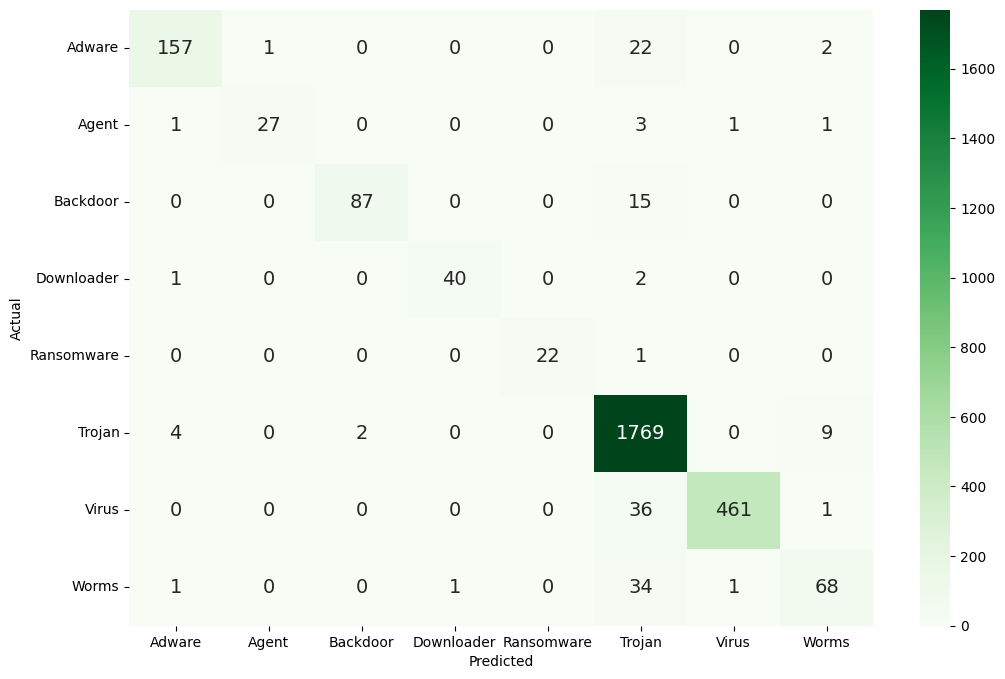

In [33]:
#Heatmapof the confusion matrix ECLF Model
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
x_label=target_names #x_label=['Adware','Agent','Backdoor','Trojan','Virus','Worms']
y_label=target_names #y_label=['Adware','Agent','Backdoor','Trojan','Virus','Worms']
sn.heatmap(conf_matrix_ECLF, annot=True,cmap="Greens",fmt='.4g',annot_kws={"size": 14},xticklabels=x_label, yticklabels=y_label)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("VirusShare_ECLF_cfm.eps",format='eps',dpi=1200)

In [14]:
#KNN_OUTPUT_LABELS.txt
KNN_LABELS = open("KNN_OUTPUT_LABELS.txt", 'r')
y_predict_KNN=KNN_LABELS.readlines()

y_predict_KNN=str(y_predict_KNN[0])
y_predict_KNN=y_predict_KNN.replace('[','')
y_predict_KNN=y_predict_KNN.replace(']','')
#print(ORG_LABELS)
y_predict_KNN=list(map(int,y_predict_KNN.split(',')))

conf_matrix_KNN=confusion_matrix(y_test, y_predict_KNN)
print(conf_matrix_KNN)
print(f'{classification_report(y_test, y_predict_KNN)}')


[[ 157    0    0    0    0   24    0    1]
 [   2   27    0    0    0    4    0    0]
 [   0    0   87    0    0   15    0    0]
 [   0    0    0   40    0    3    0    0]
 [   0    0    0    0   23    0    0    0]
 [  10    0    3    5    0 1749    1   16]
 [   0    0    0    1    0   35  461    1]
 [   2    1    0    0    0   26    1   75]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       182
           1       0.96      0.82      0.89        33
           2       0.97      0.85      0.91       102
           3       0.87      0.93      0.90        43
           4       1.00      1.00      1.00        23
           5       0.94      0.98      0.96      1784
           6       1.00      0.93      0.96       498
           7       0.81      0.71      0.76       105

    accuracy                           0.95      2770
   macro avg       0.93      0.89      0.91      2770
weighted avg       0.95      0.95      0.94      2770



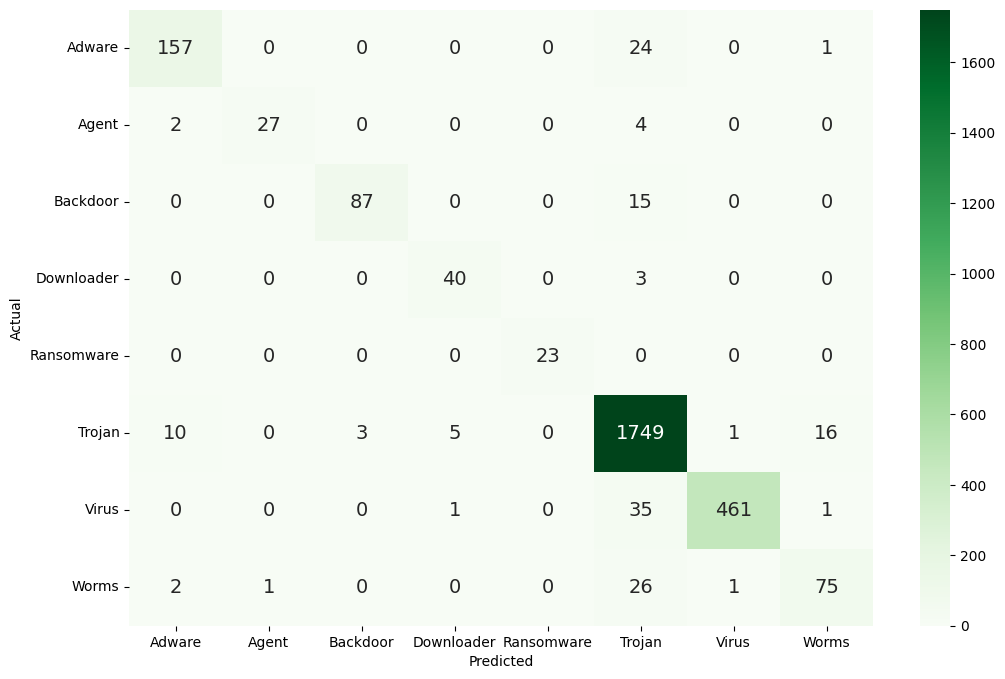

In [34]:
#Heatmapof the confusion matrix KNN Model
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
x_label=target_names #x_label=['Adware','Agent','Backdoor','Trojan','Virus','Worms']
y_label=target_names #y_label=['Adware','Agent','Backdoor','Trojan','Virus','Worms']
sn.heatmap(conf_matrix_KNN, annot=True,cmap="Greens",fmt='.4g',annot_kws={"size": 14},xticklabels=x_label, yticklabels=y_label)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("VirusShare_KNN_cfm.eps",format='eps',dpi=1200)

In [16]:
#RF_OUTPUT_LABELS.txt
RF_LABELS = open("RF_OUTPUT_LABELS.txt", 'r')
y_predict_RF=RF_LABELS.readlines()

y_predict_RF=str(y_predict_RF[0])
y_predict_RF=y_predict_RF.replace('[','')
y_predict_RF=y_predict_RF.replace(']','')
#print(ORG_LABELS)
y_predict_RF=list(map(int,y_predict_RF.split(',')))

conf_matrix_RF=confusion_matrix(y_test, y_predict_RF)
print(conf_matrix_RF)
print(f'{classification_report(y_test, y_predict_RF)}')

[[ 153    0    0    0    0   27    1    1]
 [   1   27    0    0    0    3    2    0]
 [   0    0   87    0    0   15    0    0]
 [   0    0    0   41    0    2    0    0]
 [   0    0    0    0   22    1    0    0]
 [   5    0    2    0    0 1769    3    5]
 [   0    0    0    0    0   32  465    1]
 [   1    0    0    0    0   32    3   69]]
              precision    recall  f1-score   support

           0       0.96      0.84      0.89       182
           1       1.00      0.82      0.90        33
           2       0.98      0.85      0.91       102
           3       1.00      0.95      0.98        43
           4       1.00      0.96      0.98        23
           5       0.94      0.99      0.97      1784
           6       0.98      0.93      0.96       498
           7       0.91      0.66      0.76       105

    accuracy                           0.95      2770
   macro avg       0.97      0.88      0.92      2770
weighted avg       0.95      0.95      0.95      2770



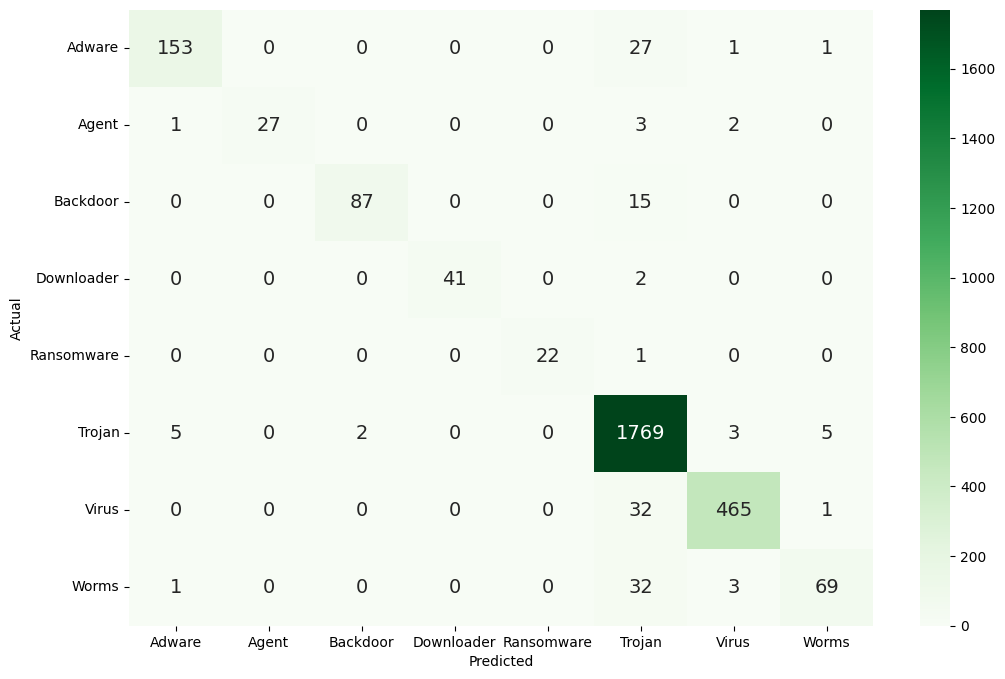

In [35]:
#Heatmapof the confusion matrix RF Model
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
x_label=target_names #x_label=['Adware','Agent','Backdoor','Trojan','Virus','Worms']
y_label=target_names #y_label=['Adware','Agent','Backdoor','Trojan','Virus','Worms']
sn.heatmap(conf_matrix_RF, annot=True,cmap="Greens",fmt='.4g',annot_kws={"size": 14},xticklabels=x_label, yticklabels=y_label)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("VirusShare_RF_cfm.eps",format='eps',dpi=1200)

In [18]:
#SVC_OUTPUT_LABELS.txt

SVC_LABELS = open("SVC_OUTPUT_LABELS.txt", 'r')
y_predict_SVC=SVC_LABELS.readlines()

y_predict_SVC=str(y_predict_SVC[0])
y_predict_SVC=y_predict_SVC.replace('[','')
y_predict_SVC=y_predict_SVC.replace(']','')
#print(ORG_LABELS)
y_predict_SVC=list(map(int,y_predict_SVC.split(',')))

conf_matrix_SVC=confusion_matrix(y_test, y_predict_SVC)
print(conf_matrix_SVC)
print(f'{classification_report(y_test, y_predict_SVC)}')

[[ 158    0    0    0    0   24    0    0]
 [   1   28    0    0    0    2    1    1]
 [   0    0   87    0    0   15    0    0]
 [   0    0    0   40    0    3    0    0]
 [   0    0    0    0   22    1    0    0]
 [   5    1    1    2    0 1767    1    7]
 [   0    0    0    0    0   36  461    1]
 [   4    0    0    1    0   33    1   66]]
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       182
           1       0.97      0.85      0.90        33
           2       0.99      0.85      0.92       102
           3       0.93      0.93      0.93        43
           4       1.00      0.96      0.98        23
           5       0.94      0.99      0.96      1784
           6       0.99      0.93      0.96       498
           7       0.88      0.63      0.73       105

    accuracy                           0.95      2770
   macro avg       0.95      0.88      0.91      2770
weighted avg       0.95      0.95      0.95      2770



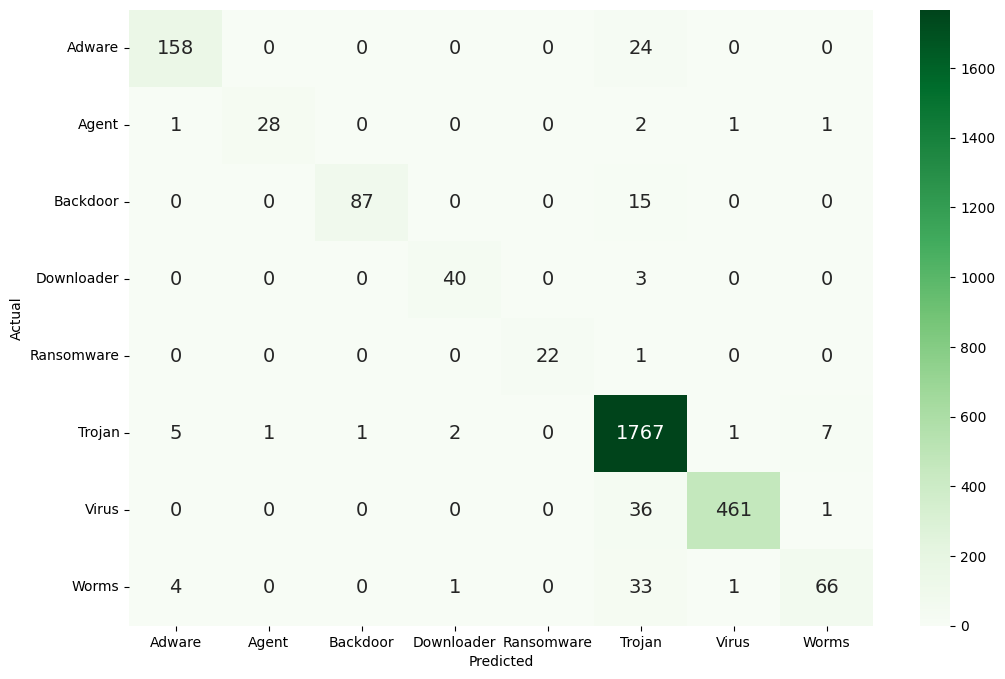

In [36]:
#Heatmapof the confusion matrix SVC Model
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
x_label=target_names #x_label=['Adware','Agent','Backdoor','Trojan','Virus','Worms']
y_label=target_names #y_label=['Adware','Agent','Backdoor','Trojan','Virus','Worms']
sn.heatmap(conf_matrix_SVC, annot=True,cmap="Greens",fmt='.4g',annot_kws={"size": 14},xticklabels=x_label, yticklabels=y_label)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("VirusShare_SVC_cfm.eps",format='eps',dpi=1200)

In [119]:
#Load the data
MAL_API_DATA=pd.DataFrame()
MAL_API_DATA=pd.read_csv('MAL-API-2019_DATASET_PLOT_INFO',index_col=['API_Sequence_Length'])

In [120]:
MAL_API_DATA

ORGINAL  DUP_REMOVED  ECLF_AFS_PRUNED  SVC_AFS_PRUNED  \
API_Sequence_Length                                                          
=0                         0            0                0               0   
>0&<20                    55         1227             3523            3348   
>=20&<40                 281         2316             1820            2227   
>=40&<60                 294         2241             1050             810   
>=60&<80                 191          845              370             446   
>=80&<100                237          372              262             206   
>=100&<150               316          106               82              70   
>=150&<200               270            0                0               0   
>=200&<250               267            0                0               0   
>=250&<300               263            0                0               0   
>=300                   4933            0                0               0   

                     RF_AFS_PRUNED  KNN_AFS_PRUNED  
API_Sequence_Length                                 
=0                               0               0  
>0&<20                        3516            3397  
>=20&<40                      1820            1827  
>=40&<60                      1054            1214  
>=60&<80                       374             363  
>=80&<100                      274             247  
>=100&<150                      69              59  
>=150&<200                       0               0  
>=200&<250                       0               0  
>=250&<300                       0               0  
>=300                            0               0

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


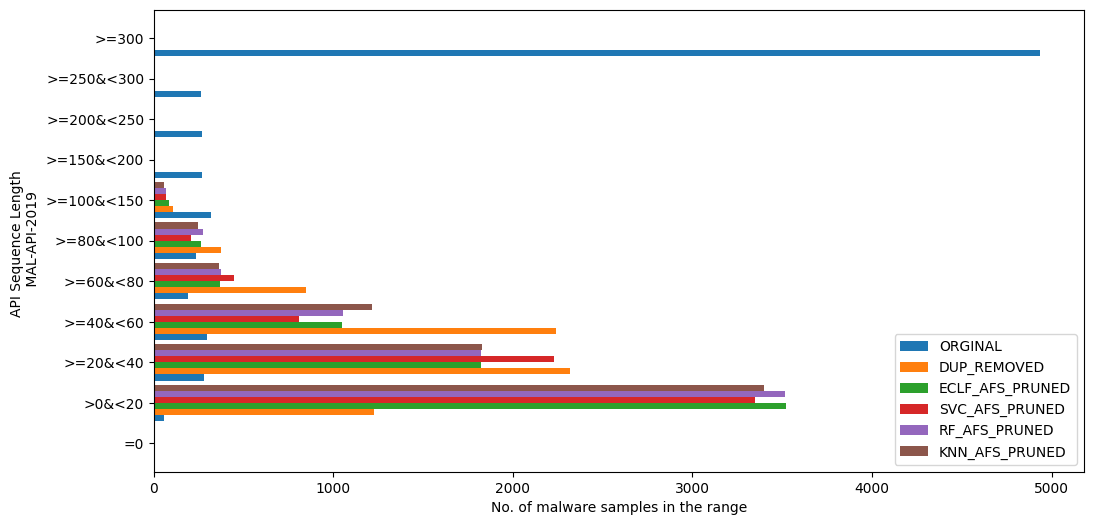

In [122]:
#df=pd.read_csv('test_plot',index_col=['API Sequence Length'])
MAL_API_DATA=MAL_API_DATA.iloc[::-1]
# Plot grouped horizontal bar chart 
#plt.figure(figsize=(12,6)) color={"darkorange", "cornflowerblue"},
MAL_API_DATA.plot.barh(width=.9,figsize=(12,6)) 
#plt.xlabel('Sample size in Millions')
plt.legend(loc=0)
# Define axes labels    Sample plotname: Malware_VirusSample_DupRemoved
plt.xlabel("No. of malware samples in the range")
plt.ylabel("API Sequence Length \n MAL-API-2019")
plt.savefig('Length_distribution_MAL-API-2019.eps',format='eps', dpi=1500)

In [123]:
#Load the data
VirusShare_DATA=pd.DataFrame()
VirusShare_DATA=pd.read_csv('VirusShare_DATASET_PLOT_INFO',index_col=['API_Sequence_Length'])

In [124]:
VirusShare_DATA

ORGINAL  DUP_REMOVED  ECLF_AFS_PRUNED  SVC_AFS_PRUNED  \
API_Sequence_Length                                                          
=0                         0            0                0               0   
>0&<20                  7458         7458             7473            7475   
>=20&<40                 473          478              580             559   
>=40&<60                 600          619              813             643   
>=60&<80                 434          455              896             634   
>=80&<100                717          819              772             737   
>=100&<150              1616         1594             1691            2070   
>=150&<200               746          627              363             482   
>=200&<250               902          897              538             543   
>=250&<300               408          409              294             291   
>=300                    495          493              429             415   

                     RF_AFS_PRUNED  KNN_AFS_PRUNED  
API_Sequence_Length                                 
=0                               0               0  
>0&<20                        7480            7475  
>=20&<40                       559             559  
>=40&<60                       661             640  
>=60&<80                       651             612  
>=80&<100                      765             724  
>=100&<150                    2053            2008  
>=150&<200                     424             580  
>=200&<250                     543             545  
>=250&<300                     293             291  
>=300                          420             415

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


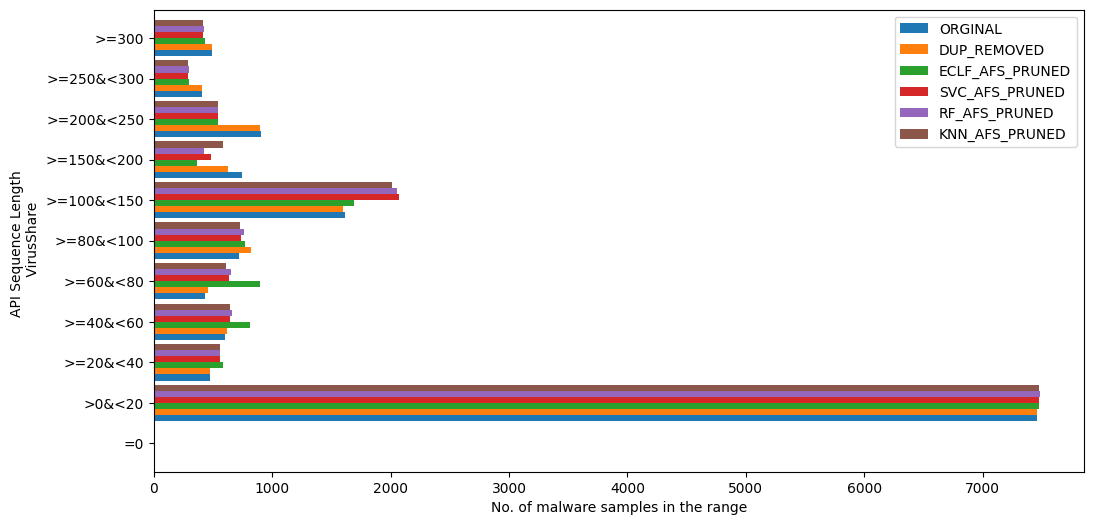

In [126]:
#df=pd.read_csv('test_plot',index_col=['API Sequence Length'])
VirusShare_DATA=VirusShare_DATA.iloc[::-1]
# Plot grouped horizontal bar chart 
#plt.figure(figsize=(12,6)) color={"darkorange", "cornflowerblue"},
VirusShare_DATA.plot.barh(width=.9,figsize=(12,6)) 
#plt.xlabel('Sample size in Millions')
plt.legend(loc=0)
# Define axes labels    Sample plotname: Malware_VirusSample_DupRemoved
plt.xlabel("No. of malware samples in the range")
plt.ylabel("API Sequence Length \n VirusShare")
plt.savefig('Length_distribution_VirusShare.eps',format='eps', dpi=1500)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 1400x800 with 0 Axes>

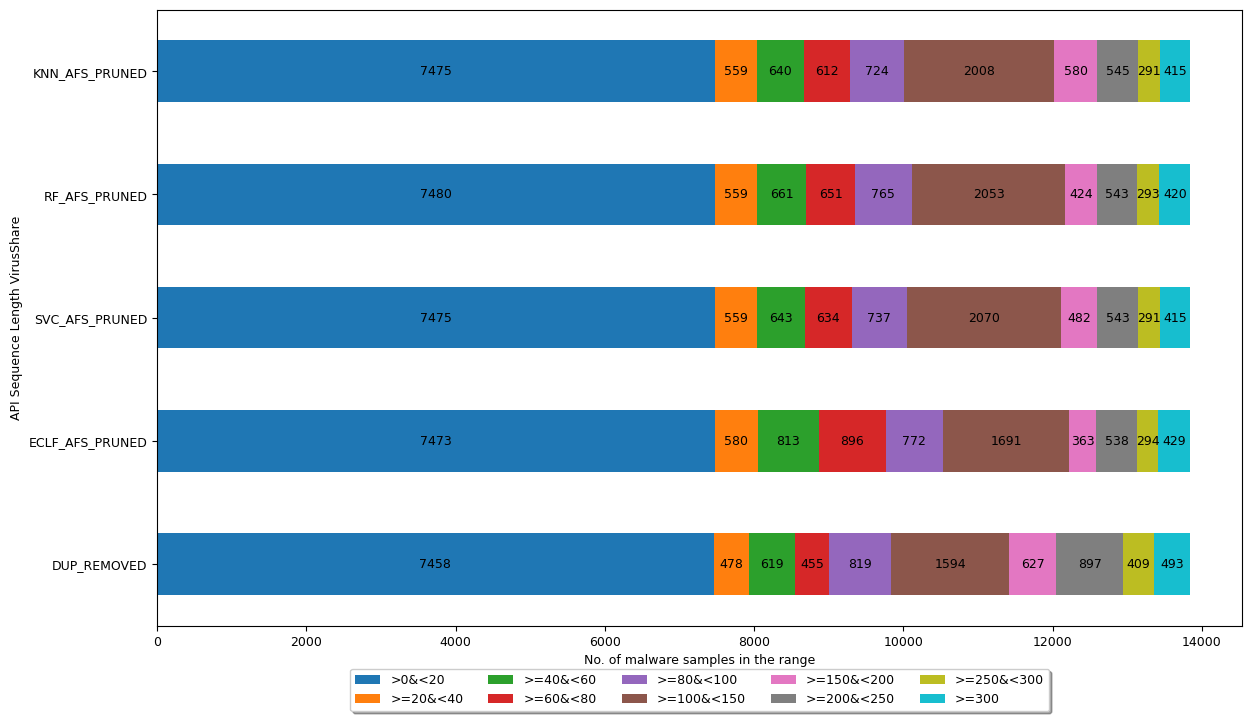

In [204]:
import pandas as pd
import matplotlib.pyplot as plt

VirusShare_DATA=pd.read_csv('VirusShare_DATASET_PLOT_INFO',index_col=['API_Sequence_Length'])
#display(VirusShare_DATA)

VirusShare_DATA_T = VirusShare_DATA.T
FONT=9
# plot
plt.figure(figsize = (14,8))
ax = VirusShare_DATA_T.plot.barh(stacked=True, figsize=(14,8))

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.06), fancybox=True, shadow=True, ncol=5,fontsize=FONT)

plt.yticks(fontsize=FONT)
plt.xticks(fontsize=FONT)
# annotations:
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0:
         ax.annotate(f'{width:0.0f}', xy=(left+width/2, bottom+height/2), ha='center', va='center',fontsize=FONT)
            
plt.xlabel("No. of malware samples in the range",fontsize=FONT)
plt.ylabel("API Sequence Length VirusShare",fontsize=FONT)
plt.savefig('Length_distribution_VirusShare.eps',format='eps', dpi=1500)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 1400x800 with 0 Axes>

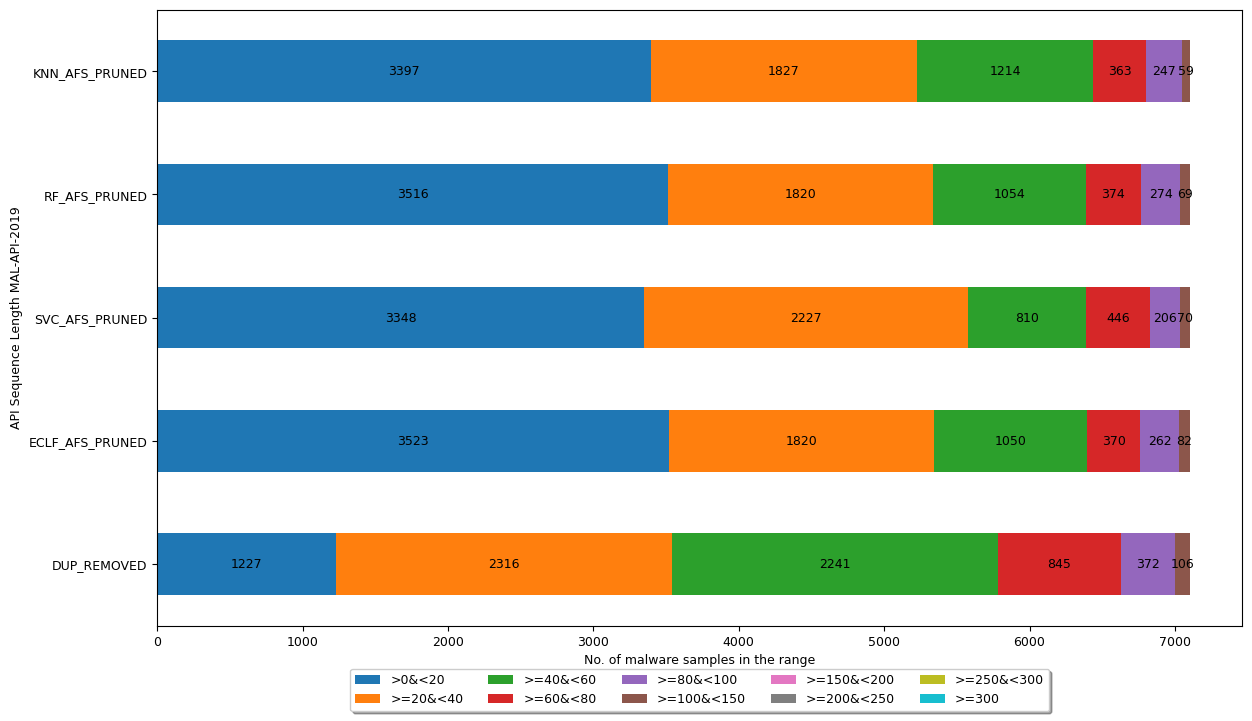

In [202]:
import pandas as pd
import matplotlib.pyplot as plt

#Load the data
MAL_API_DATA=pd.DataFrame()
MAL_API_DATA=pd.read_csv('MAL-API-2019_DATASET_PLOT_INFO',index_col=['API_Sequence_Length'])

MAL_API_DATA_T = MAL_API_DATA.T

FONT=9
# plot
plt.figure(figsize = (14,8))
ax = MAL_API_DATA_T.plot.barh(stacked=True, figsize=(14, 8))

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.06), fancybox=True, shadow=True, ncol=5,fontsize=FONT)

plt.yticks(fontsize=FONT)
plt.xticks(fontsize=FONT)
# annotations:
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0:
         ax.annotate(f'{width:0.0f}', xy=(left+width/2, bottom+height/2), ha='center', va='center',fontsize=FONT)
            
plt.xlabel("No. of malware samples in the range",fontsize=FONT)
plt.ylabel("API Sequence Length MAL-API-2019",fontsize=FONT)
plt.savefig('Length_distribution_MAL-API-2019.eps',format='eps', dpi=1500)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 1400x800 with 0 Axes>

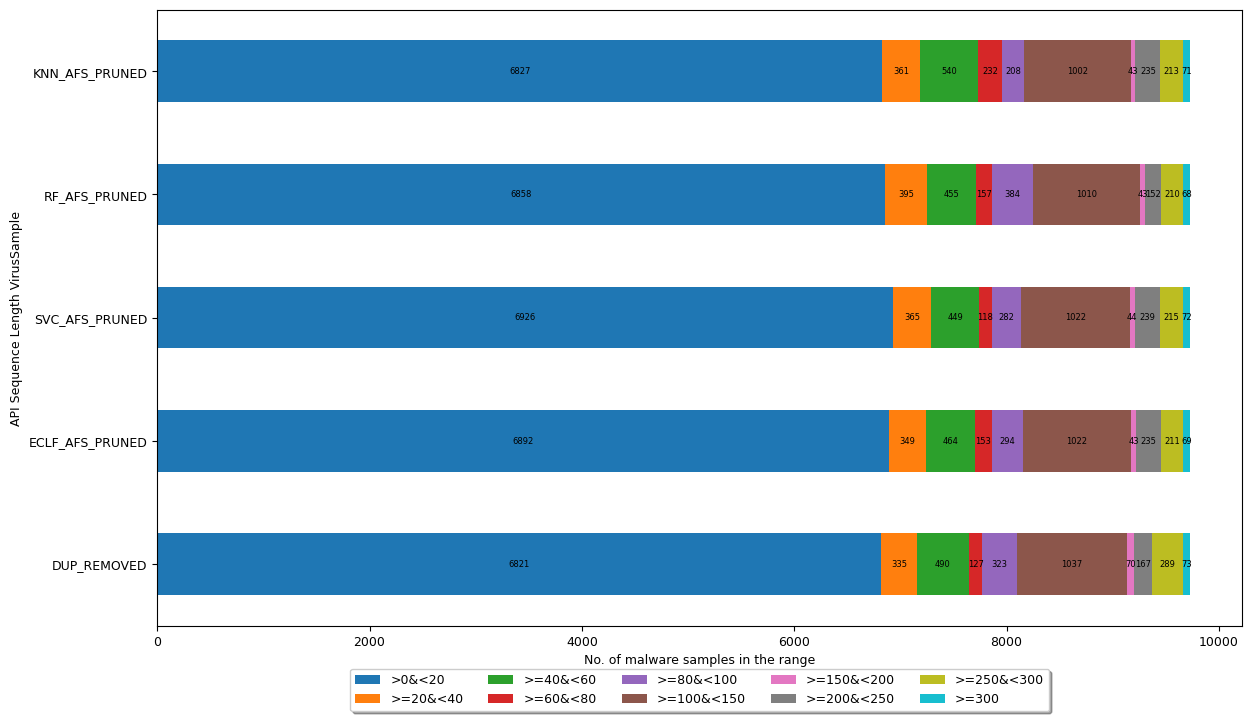

In [203]:
import pandas as pd
import matplotlib.pyplot as plt

#Load the data
VirusSample_DATA=pd.DataFrame()
VirusSample_DATA=pd.read_csv('VirusSample_DATASET_PLOT_INFO',index_col=['API_Sequence_Length'])

VirusSample_DATA = VirusSample_DATA.T

FONT=6
# plot
plt.figure(figsize = (14,8))
ax = VirusSample_DATA.plot.barh(stacked=True, figsize=(14, 8))

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.06), fancybox=True, shadow=True, ncol=5,fontsize=FONT+3)

plt.yticks(fontsize=FONT+3)
plt.xticks(fontsize=FONT+3)
# annotations:
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0:
         ax.annotate(f'{width:0.0f}', xy=(left+width/2, bottom+height/2), ha='center', va='center',fontsize=FONT)
            
plt.xlabel("No. of malware samples in the range",fontsize=FONT+3)
plt.ylabel("API Sequence Length VirusSample",fontsize=FONT+3)
plt.savefig('Length_distribution_VirusSample.eps',format='eps', dpi=1500)